# 学号 姓名 pandas练习2

### 一、DataFrame基本操作
1. 从“test1.txt”文件中读取4位学生的成绩，保存于自定义的DataFrame中；
2. 利用DataFrame的切片操作，分别获取小红、张明、小江、小李的各科成绩，分别保存于四个不同的DataFrame中；
3. 计算每个同学各科成绩的平均分保存至一个自定义的DataFrame中，自定义该DataFrame的index、columns名称并输出。

#### 1.1 从“test1.txt”文件中读取4位学生的成绩，保存于自定义的DataFrame中

In [7]:
import pandas as pd
df=pd.read_table("test1.txt")
df

,"姓名,科目,cz"
0,"小红,语文,100"
1,"小红,英语,90"
2,"小红,数学,75"
3,"张明,语文,80"
4,"张明,英语,76"
5,"张明,数学,88"
6,"小江,语文,79"
7,"小江,数学,120"
8,"小江,英语,80"
9,"小李,英语,87"


#### 1.2 利用DataFrame的切片操作，分别获取小红、张明、小江、小李的各科成绩，分别保存于四个不同的DataFrame中

In [8]:
xh_scores = df[0:3]
xh_scores

,"姓名,科目,cz"
0,"小红,语文,100"
1,"小红,英语,90"
2,"小红,数学,75"


In [9]:
zm_scores = df[3:6]
zm_scores

,"姓名,科目,cz"
3,"张明,语文,80"
4,"张明,英语,76"
5,"张明,数学,88"


In [10]:
xj_scores = df[6:9]
xj_scores

,"姓名,科目,cz"
6,"小江,语文,79"
7,"小江,数学,120"
8,"小江,英语,80"


In [11]:
xl_scores = df[9:]
xl_scores

,"姓名,科目,cz"
9,"小李,英语,87"
10,"小李,语文,99"
11,"小李,数学,76"


#### 1.3 计算每个同学各科成绩的平均分保存至一个自定义的DataFrame中，自定义该DataFrame的index、columns名称并输出

In [12]:
m1=xh_scores['成绩'].mean()
m2=xj_scores['成绩'].mean()
m3=xl_scores['成绩'].mean()
m1
m2
m3

KeyError: '成绩'

### 二、Pandas基本分析方法
1. 读取文件“grade.xls”中的grade表中的信息，保存于自定义的一个DataFrame中；
2. 新增一列“总评成绩”，该列值按照平时40%、期末60%的比例计算；
3. 对`平时成绩`、`期末成绩`、`总评成绩`进行`描述性分析`（pd.describe()），并对分析结果进行总结；
4. 对`平时成绩`和`期末成绩`进行成绩`分层`：
  - 0-59：差，60-79：中，80-89：良，90-100：优
  - 新增两列为：平时成绩等级，期末成绩等级
5. 按平时成绩等级分组分析期末成绩的`均值`、`最大值`、`最小值`和`每组人数`；
6. 对`平时成绩`和`期末成绩`进行`交叉分析`，统计`总评成绩`的`平均值`；
7. 请对第5、6两题（分组及交叉分析）的输出结果进行总结，用文字描述一下从中观察到的成绩特点及其形成的原因。

#### 2.1 读取成绩表信息

In [56]:
file_path = "grade.xls"
df = pd.read_excel(file_path, sheet_name="grade")
df

,学号,平时成绩,期末成绩
0,2017001,80,66
1,2017002,87,67
2,2017003,85,60
3,2017004,80,55
4,2017005,76,44
5,2017006,90,76
6,2017007,84,68
7,2017008,90,83
8,2017009,88,80
9,2017010,90,74


#### 2.2 新增一列“总评成绩”，该列值按照平时40%、期末60%的比例计算

In [57]:
df['总评成绩'] = 0.4 * df['平时成绩'] + 0.6 * df['期末成绩']
df

,学号,平时成绩,期末成绩,总评成绩
0,2017001,80,66,71.6
1,2017002,87,67,75.0
2,2017003,85,60,70.0
3,2017004,80,55,65.0
4,2017005,76,44,56.8
5,2017006,90,76,81.6
6,2017007,84,68,74.4
7,2017008,90,83,85.8
8,2017009,88,80,83.2
9,2017010,90,74,80.4


#### 2.3 对平时成绩、期末成绩、总评成绩进行描述性分析

In [58]:
score_describe = df[['平时成绩', '期末成绩', '总评成绩']].describe()
score_describe

,平时成绩,期末成绩,总评成绩
count,38.000000,38.000000,38.000000
mean,84.657895,68.368421,74.884211
std,6.112797,14.695874,10.918730
min,70.000000,32.000000,47.200000
25%,81.000000,60.000000,68.700000
50%,86.500000,68.000000,74.900000
75%,89.750000,81.000000,84.700000
max,95.000000,91.000000,89.800000


#### 2.4 对平时成绩和期末成绩进行成绩分层

#### pandas.cut(x, bins, right=True, labels=None)
- cut()将一组连续值分成离散间隔。
- x：输入的连续值数组，必须是一维的
- bins : 分组依据,定义要使用的精确区间。
- right : bool, default True,是否包含最右边的值。
- labels : 每组的标签，长度必须和组的长度一致。

In [59]:
def get_grade_category(score):
    if score >= 90:
        return '优'
    elif 80 <= score < 90:
        return '良'
    elif 60 <= score < 80:
        return '中'
    else:
        return '差'

df['平时成绩等级'] = df['平时成绩'].apply(get_grade_category)
df['期末成绩等级'] = df['期末成绩'].apply(get_grade_category)

df

,学号,平时成绩,期末成绩,总评成绩,平时成绩等级,期末成绩等级
0,2017001,80,66,71.6,良,中
1,2017002,87,67,75.0,良,中
2,2017003,85,60,70.0,良,中
3,2017004,80,55,65.0,良,差
4,2017005,76,44,56.8,中,差
5,2017006,90,76,81.6,优,中
6,2017007,84,68,74.4,良,中
7,2017008,90,83,85.8,优,良
8,2017009,88,80,83.2,良,良
9,2017010,90,74,80.4,优,中


#### 2.5 按平时成绩等级分组分析期末成绩的均值、最大值、最小值和每组人数

#### Pandas聚合函数: agg(self, func=None, axis=0, *args, **kwargs)
- func: 用于聚合数据的函数，如max()、mean()、count()等，可以同时应用多个函数，放在一个列表中。 
- axis: 设置按列还是按行聚合。设置为0或index（默认值），表示对每列应用聚合函数，设置为1或columns，表示对每行应用聚合函数。
- *args: 传递给函数func的位置参数。
- **kwargs: 传递给函数func的关键字参数。

示例：
res = df.agg([np.mean, np.max, np.sum])

In [60]:
def custom_agg(series):
    return {
        '均值': series.mean(),
        '最大值': series.max(),
        '最小值': series.min(),
        '人数': series.count()
    }

result = df.groupby('平时成绩等级')['期末成绩'].agg(custom_agg).reset_index()
result

,平时成绩等级,期末成绩
0,中,"{'均值': 45.5, '最大值': 57, '最小值': 32, '人数': 6}"
1,优,"{'均值': 79.6, '最大值': 89, '最小值': 64, '人数': 10}"
2,良,"{'均值': 69.5, '最大值': 91, '最小值': 50, '人数': 22}"


#### 2.6 对平时成绩和期末成绩进行交叉分析，统计总评成绩的平均值

#### pandas中实现透视表使用的是：pandas.pivot_table
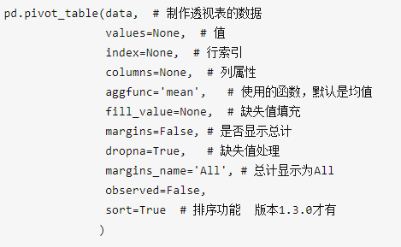

In [61]:
cross_analysis = pd.pivot_table(df, values='总评成绩', index='平时成绩等级', columns='期末成绩等级', aggfunc='mean')
cross_analysis

期末成绩等级,中,优,差,良
平时成绩等级,,,,
中,NaN,NaN,56.833333,NaN
优,78.800000,NaN,NaN,86.40
良,72.957143,89.8,63.700000,84.96
